In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\'
df = pd.read_csv(path + 'EuropeanSales.csv')
df

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [3]:
df.skew()

Population           1.045463
GDPperHead          -0.294859
UnemploymentRate     0.720345
EducationSpending    0.850790
SalesPerCapita       1.812854
ComputerSales        1.704270
dtype: float64

In [4]:
def percentage_error(dataframe,pred, true_value):
    
    '''
    dataframe: Pass in pandas dataframe variable
    pred = dataframe['Predictions'] #model.predict(x_test).reshape()
    true_value = dataframe['True Values'] #y_test
    
    '''
    
    difference = dataframe[true_value] - dataframe[pred]
    
    dataframe['Error(%)']= np.absolute(difference/dataframe[true_value]*100)
    
    print('median \t {}'.format(dataframe['Error(%)'].median()))    
    print(dataframe['Error(%)'].describe())
    
def adjusted_r_squared(r2, data):
    
    x = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-x

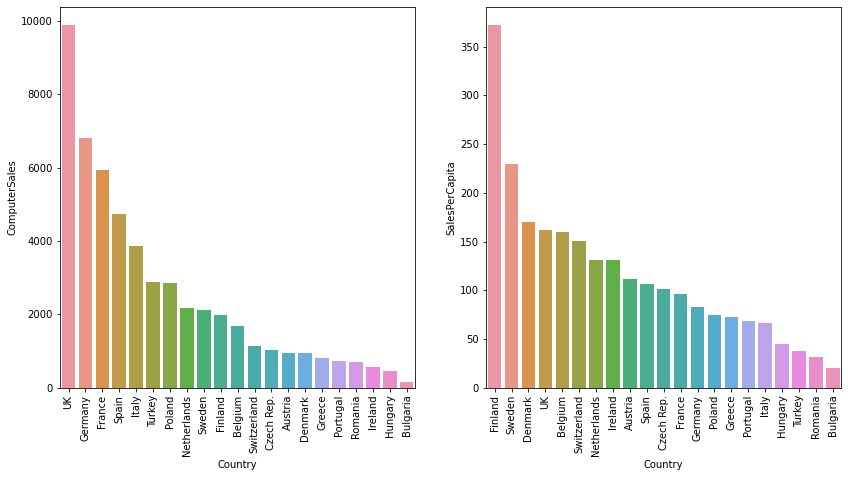

In [5]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
sns.barplot(data = df.sort_values(['ComputerSales'], ascending = False), x = 'Country', y = 'ComputerSales')
plt.xticks(rotation = 90);

plt.subplot(1,2,2)
sns.barplot(data = df.sort_values(['SalesPerCapita'], ascending = False), x = 'Country', y = 'SalesPerCapita')
plt.xticks(rotation = 90);

In [6]:
# Correlation Check

<AxesSubplot:>

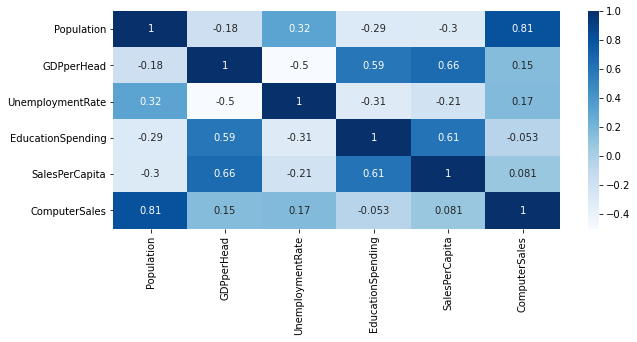

In [7]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(), annot = True, cmap ='Blues')

In [8]:
from scipy.stats import pearsonr
pearsonr(df['Population'], df['ComputerSales']), pearsonr(df['SalesPerCapita'], df['GDPperHead'])

((0.8079711173057383, 9.425963676921546e-06),
 (0.6622536261175196, 0.0010728122995484484))

In [9]:
#Normality and Homoscedasticity Check

<AxesSubplot:xlabel='EducationSpending'>

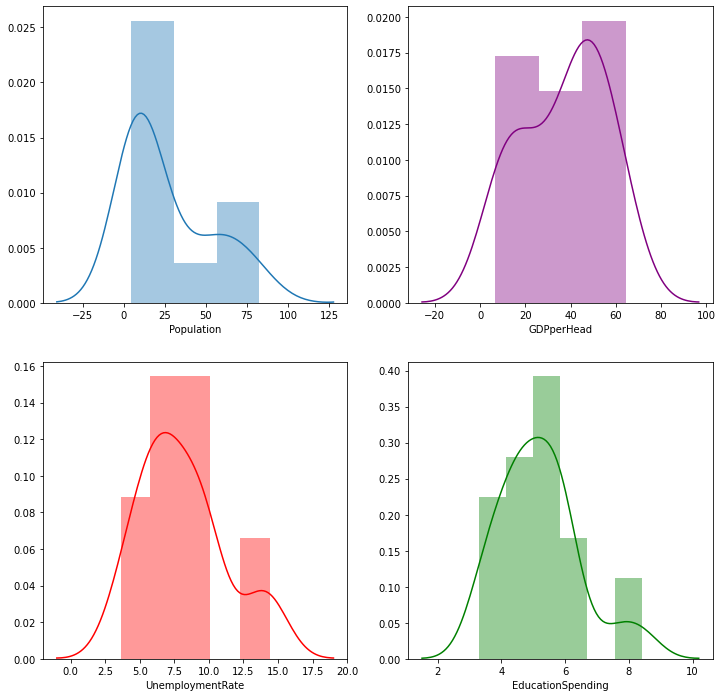

In [10]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.distplot(df['Population'])

plt.subplot(2,2,2)
sns.distplot(df['GDPperHead'], color = 'purple')

plt.subplot(2,2,3)
sns.distplot(df['UnemploymentRate'], color = 'r')

plt.subplot(2,2,4)
sns.distplot(df['EducationSpending'], color = 'g')

In [11]:
#Multicollinearity Check

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['GDPperHead', 'Population', 'EducationSpending', 'UnemploymentRate']]
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif #Report

,VIF,Features
0,9.261966,GDPperHead
1,2.388989,Population
2,17.860313,EducationSpending
3,7.270640,UnemploymentRate


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['GDPperHead', 'Population', 'UnemploymentRate']]
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif #Report

,VIF,Features
0,2.386044,GDPperHead
1,2.332715,Population
2,3.582835,UnemploymentRate


# Predict SalesPerCapita

In [14]:
# Linearity Check

<AxesSubplot:xlabel='SalesPerCapita', ylabel='EducationSpending'>

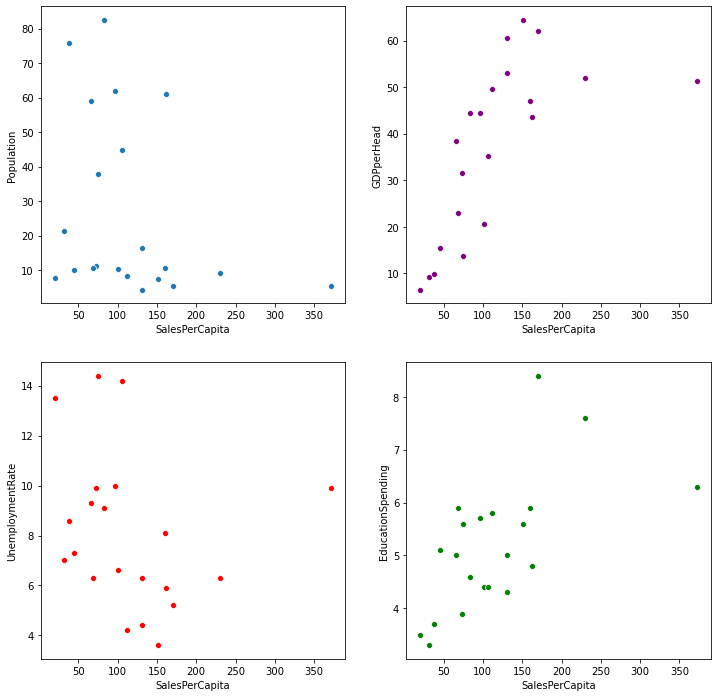

In [15]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.scatterplot(data = df, x = 'SalesPerCapita', y = 'Population')

plt.subplot(2,2,2)
sns.scatterplot(data = df, x = 'SalesPerCapita', y = 'GDPperHead', color = 'purple')

plt.subplot(2,2,3)
sns.scatterplot(data = df, x = 'SalesPerCapita', y = 'UnemploymentRate', color = 'r')

plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'SalesPerCapita', y = 'EducationSpending', color = 'g')

In [16]:
X = df['GDPperHead'].values
y = df['SalesPerCapita'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(np.reshape(X_train, (17,-1)))
X_test = scaler.transform(np.reshape(X_test, (4,-1)))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
test = pd.DataFrame()
test['TrueValues'] = y_test
test['Predictions'] = predictions

In [ ]:
percentage_error(test, 'Predictions', 'TrueValues')

In [ ]:
test

In [ ]:
plt.figure(figsize =(13,6))

plt.subplot(1,2,1)
sns.distplot(test['Error(%)'], color = 'r')

plt.subplot(1,2,2)
plt.scatter(test['TrueValues'], test['Predictions'], color='#9be0df')
plt.plot(test['TrueValues'],test['TrueValues'],'green')

In [ ]:
# R-Squared, Adjusted R-Squared, Explained Variance Score

In [ ]:
from sklearn.metrics import (mean_absolute_error, r2_score, explained_variance_score, 
                             median_absolute_error, mean_squared_error)

In [ ]:
metric_names = ['R2', 'R2-Adjusted', 'ExplainedVarianceScore', 'MeanAbsoluteError', 
                'MedianAbsoluteError', 'RootMeanSquaredError']
metric_values = [r2_score(y_test,predictions), adjusted_r_squared(r2_score(y_test,predictions), df),
                explained_variance_score(y_test,predictions), mean_absolute_error(y_test,predictions),
                median_absolute_error(y_test,predictions), np.sqrt(mean_squared_error(y_test,predictions))]

metrics = pd.DataFrame({'Metrics': metric_names, 'Values': metric_values})

In [ ]:
metrics

In [ ]:
df.describe()

# Predict ComputerSales

In [ ]:
# Linearity Check

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.scatterplot(data = df, x = 'ComputerSales', y = 'Population')

plt.subplot(2,2,2)
sns.scatterplot(data = df, x = 'ComputerSales', y = 'GDPperHead', color = 'purple')

plt.subplot(2,2,3)
sns.scatterplot(data = df, x = 'ComputerSales', y = 'UnemploymentRate', color = 'r')

plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'ComputerSales', y = 'EducationSpending', color = 'g')

In [ ]:
X = df[['Population', 'GDPperHead']].values
y = df['ComputerSales'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(np.reshape(X_train, (17,-1)))
X_test = scaler.transform(np.reshape(X_test, (4,-1)))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
test = pd.DataFrame()
test['TrueValues'] = y_test
test['Predictions'] = predictions

In [ ]:
percentage_error(test, 'Predictions', 'TrueValues')

In [ ]:
test

In [ ]:
plt.figure(figsize =(13,6))

plt.subplot(1,2,1)
sns.distplot(test['Error(%)'], color = 'r')

plt.subplot(1,2,2)
plt.scatter(test['TrueValues'], test['Predictions'], color='#9be0df')
plt.plot(test['TrueValues'],test['TrueValues'],'green')

In [ ]:
# R-Squared, Adjusted R-Squared, Explained Variance Score

In [ ]:
from sklearn.metrics import (mean_absolute_error, r2_score, explained_variance_score, 
                             median_absolute_error, mean_squared_error)

In [ ]:
metric_names = ['R2', 'R2-Adjusted', 'ExplainedVarianceScore', 'MeanAbsoluteError', 
                'MedianAbsoluteError', 'RootMeanSquaredError']
metric_values = [r2_score(y_test,predictions), adjusted_r_squared(r2_score(y_test,predictions), df),
                explained_variance_score(y_test,predictions), mean_absolute_error(y_test,predictions),
                median_absolute_error(y_test,predictions), np.sqrt(mean_squared_error(y_test,predictions))]

metrics = pd.DataFrame({'Metrics': metric_names, 'Values': metric_values})

In [ ]:
metrics

In [ ]:
df.describe()